# BeautifulSoup

## BeautifulSoup 특징
- HTML과 XML 파일에서 데이터를 뽑아내기 위한 파이썬 라이브러리
- HTML과 XML의 트리 구조를 탐색, 검색, 변경 가능
- 다양한 파서(parser)를 선택하여 이용가능

### parser 종류
- html parser
  - ```BeautifulSoup(markup, 'html.parser')```
- lxml HTML parser
  - ```BeautifulSoup(markup, 'lxml')```
- lxml XML parser
  - ```BeautifulSoup(markup, 'lxml-xml')```
  - ```BeautifulSoup(markup, 'xml')```
- html5lib
  - ```BeautifulSoup(markup, 'html5lib)```

## HTML 파싱(Parsing)

### 웹페이지 예제 생성

In [4]:
%%writefile example.html
<! DOCTYPE html>
<html>
  <head>
    <title>Page Title</title>
  </head>
  <body>
    <h1>Heading</h1>
    <p>Paragraph</p>
    <div>
      <a href="www.google.com">google</a>
    </div>
    <div class="class1">
      <p>a</p>
      <a href="www.naver.com">naver</a>
      <p>b</p>
      <p>c</p>
    </div>
    <div id="id1">
      Example page
      <p>g</p>
    </div>
  </body>
</html>

Overwriting example.html


In [5]:
from bs4 import BeautifulSoup
import urllib.request

with open("example.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

soup

<!-- DOCTYPE html-->
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h1>Heading</h1>
<p>Paragraph</p>
<div>
<a href="www.google.com">google</a>
</div>
<div class="class1">
<p>a</p>
<a href="www.naver.com">naver</a>
<p>b</p>
<p>c</p>
</div>
<div id="id1">
      Example page
      <p>g</p>
</div>
</body>
</html>

In [6]:
print(soup.prettify())

<!-- DOCTYPE html-->
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h1>
   Heading
  </h1>
  <p>
   Paragraph
  </p>
  <div>
   <a href="www.google.com">
    google
   </a>
  </div>
  <div class="class1">
   <p>
    a
   </p>
   <a href="www.naver.com">
    naver
   </a>
   <p>
    b
   </p>
   <p>
    c
   </p>
  </div>
  <div id="id1">
   Example page
   <p>
    g
   </p>
  </div>
 </body>
</html>


### HTML 태그 파싱

In [7]:
# 태그명 포함 텍스트
soup.title

<title>Page Title</title>

In [8]:
# 태그명만 출력
soup.title.name

'title'

In [9]:
# 태그명 제거 텍스트(값)
soup.title.string

'Page Title'

In [10]:
# 태그가 포함되어 있는 부모 태그 추출
soup.title.parent

<head>
<title>Page Title</title>
</head>

In [11]:
soup.title.parent.name

'head'

In [12]:
# HTML 구조적 관계를 위 메서드를 활용하여 알아낼 수 있다.

In [13]:
soup.h1

<h1>Heading</h1>

In [14]:
soup.p

<p>Paragraph</p>

In [15]:
soup.div

<div>
<a href="www.google.com">google</a>
</div>

In [16]:
soup.a

<a href="www.google.com">google</a>

### HTML 태그 검색 메서드
- find()
  - 해당 조건에 맞는 하나의 태그 추출
- find_all()
  - 해당 조건에 맞는 모든 태그 추출
- select()
  - CSS Selector와 같은 형식으로 선택 가능

In [17]:
# 첫번째 div 태그 추출
soup_find = soup.find('div')
print(soup_find)

<div>
<a href="www.google.com">google</a>
</div>


In [18]:
# 모든 div 태그 추출
soup_find_all = soup.find_all('div')
print(soup_find_all)

[<div>
<a href="www.google.com">google</a>
</div>, <div class="class1">
<p>a</p>
<a href="www.naver.com">naver</a>
<p>b</p>
<p>c</p>
</div>, <div id="id1">
      Example page
      <p>g</p>
</div>]


In [19]:
# 앞뒤에 꺽쇄([]) 표시로 보아 "리스트-형태"로 반환한다는 점 주의하기

In [21]:
# id 값으로 찾기
find_by_id = soup.find('div', {'id': 'id1'})
print(find_by_id)

<div id="id1">
      Example page
      <p>g</p>
</div>


In [22]:
find_by_id = soup.find_all('div', {'id': 'id1'})
print(find_by_id)

[<div id="id1">
      Example page
      <p>g</p>
</div>]


In [23]:
# find_all은 리스트 형태로 반환한다.

In [24]:
find_by_class = soup.find_all('div', {'class': 'class1'})
print(find_by_class)

[<div class="class1">
<p>a</p>
<a href="www.naver.com">naver</a>
<p>b</p>
<p>c</p>
</div>]


In [26]:
soup.find('a')

<a href="www.google.com">google</a>

In [25]:
# 태그의 속성값 추출
soup.find('a').get('href')

'www.google.com'

In [27]:
# 태그의 텍스트 추출
soup.find('a').get_text()

'google'

In [31]:
site_names = soup.find_all('a') # list
for name in site_names: # for every elem,
    print(name.get('href')) # print hyperlink

www.google.com
www.naver.com


In [32]:
site_names = soup.find_all('a') # list
for name in site_names: # for every elem,
    print(name.get_text()) # print hyperlink

google
naver


#### select method
- '#': id
- '.': class

In [33]:
id1 = soup.select('div#id1')
id1

[<div id="id1">
       Example page
       <p>g</p>
 </div>]

In [35]:
class1 = soup.select('div.class1')
class1

[<div class="class1">
 <p>a</p>
 <a href="www.naver.com">naver</a>
 <p>b</p>
 <p>c</p>
 </div>]

In [39]:
class1_a = soup.select('div.class1 a')
class1_a

[<a href="www.naver.com">naver</a>]

In [38]:
class1_a = soup.select('div.class1 > a')
class1_a

[<a href="www.naver.com">naver</a>]

### 웹페이지 콘텐츠 가져오기

In [47]:
%%writefile anthem.html
<!DOCTYPE html>
<html>
<head>
</head>
<body>
  <div>
  <p id="title">애국가</p>
  <p id="content">
    동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라만세.<br />
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
  </p>
  <p id="content">
    남산 위에 저 소나무, 철갑을 두른 듯 바람 서리 불변함은 우리 기상일세.<br />
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
  </p>
  <p id="content">
    가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.<br />
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
  </p>
  <p id="content">
    이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.<br />
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
  </p>
  </div>
</body>
</html>

Overwriting anthem.html


In [48]:
with open("anthem.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

soup

<!DOCTYPE html>

<html>
<head>
</head>
<body>
<div>
<p id="title">애국가</p>
<p id="content">
    동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라만세.<br/>
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
<p id="content">
    남산 위에 저 소나무, 철갑을 두른 듯 바람 서리 불변함은 우리 기상일세.<br/>
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
<p id="content">
    가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.<br/>
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
<p id="content">
    이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.<br/>
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
</div>
</body>
</html>

In [49]:
title = soup.find('p', {'id': 'title'})
contents = soup.find_all('p', {'id': 'content'})

print(title.get_text())
for content in contents:
    print(content.get_text())

애국가

    동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라만세.
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.


    남산 위에 저 소나무, 철갑을 두른 듯 바람 서리 불변함은 우리 기상일세.
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.


    가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.


    이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.
    무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.



### 인터넷 웹페이지 가져오기

In [ ]:
url = "http://suanlab.com"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')
soup

In [53]:
labels = soup.find_all(['label'])
for label in labels:
    print(label.get_text())

[2020-04-14] "메타버스 시대가 오고 있다"
[2020-01-20] "바이러스 연구부터 뷰티·배달 AI 결합한 비즈니스..."
[2020-10-07] "이력서 작성·레시피 제공 다양하게 활용되는 GPT3"
[2020-05-20] "인공지능의 보안 위협"
[2020-03-04] "데이터 경제 시대"
[2019-12-25] "마이데이터 시대의 도래 데이터 주권과 새로운 가치"
[2019-09-04] "농업으로 들어간 인공지능"
[2019-08-07] "AI시대 지배할 것인가 지배당하며 살 것인가"


In [56]:
labels = soup.select('#wrapper > section > div > div > div > div > div > label')
for label in labels:
    print(label.get_text())

[2020-04-14] "메타버스 시대가 오고 있다"
[2020-01-20] "바이러스 연구부터 뷰티·배달 AI 결합한 비즈니스..."
[2020-10-07] "이력서 작성·레시피 제공 다양하게 활용되는 GPT3"
[2020-05-20] "인공지능의 보안 위협"
[2020-03-04] "데이터 경제 시대"
[2019-12-25] "마이데이터 시대의 도래 데이터 주권과 새로운 가치"
[2019-09-04] "농업으로 들어간 인공지능"
[2019-08-07] "AI시대 지배할 것인가 지배당하며 살 것인가"


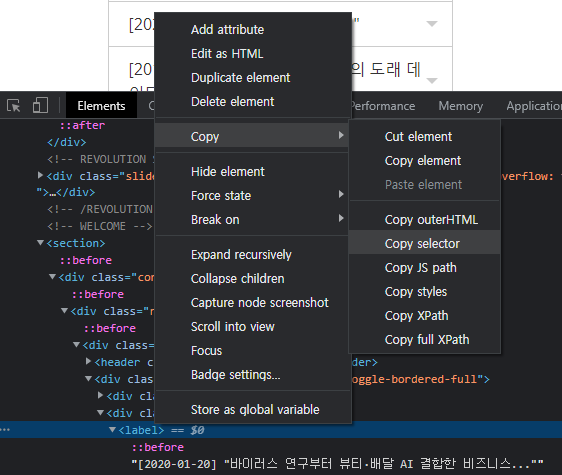

- (원본) #wrapper > section > div > div > div:nth-child(1) > div > div:nth-child(2) > label
- nth-child(n)을 가져오게 되면 한 요소만 가져오게 되므로 제거한다.
- (수정) #wrapper > section > div > div > div > div > div > label